# I. Introduction 

## 1. Domain-specific area
This project will be related to housing and real-estate. 

## 2. Dataset

Rolling Sales Data collected by the Department of Finance of the United States of America (USA) providing information about property sales in New York City (NYC). 
The NYC Sales Data for each of the 5 neighbourhoods from nyc.gov was compiled into a single CSV file and published on Kaggle. The dataset can be accessed via the Kaggle official website. 

The dataset contains details of the properties sold in NYC over a 12-month period from September 2016 to 2017. 
There are a total of 84548 rows and 22 columns in this dataset and the filesize is 13.68MB. 
Datatypes include integers and objects. Datatypes of some of the attributes will be converted during data cleaning. 



## 3. Objectives of the project
The objective of this project is to identify features that most affects and contributes to the property sale prices in New York City through exploratory data analysis and data regression models. The performance of the machine learning models will also be evaluated as well.  
This project will be insightful and meaningful for property buyers as they will be able to gain better and deeper understanding of the housing market in New York City and make more informed decisions when deciding to purchase a property. Likewise, real estate agents and property owners looking to sell will not be lowballed and sell their property at a profitable price. 

# II. Implementation

## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
%matplotlib inline 

## Load the dataset 
The dataset is in a CSV file 

In [2]:
#load dataset
df_housing = pd.read_csv('./nyc-rolling-sales.csv')

## Explore the dataset

In [3]:
#transpose df for easier viewing
df_housing.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


The CSV file has contains 84548 records of data. There are 10 attributes in the dataset with an integer datatype. 

## Data Cleaning  
In this section, the dataset is cleaned and processed to prepare it for EDA. The following steps are carried out: 

1. Clean and remove irrelevant columns 
2. Convert feature data types
3. Rename and standardise column names 
4. Clean missing values
5. Identify outliers and decide whether to drop or keep them

### 1. Data Cleaning: Clean and remove irrelevant columns

In [4]:
#remove irrelevant columns
df_housing.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
#checking datatypes for each attribute
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

### 2. Data Cleaning: Convert datatypes of attributes

There are errors in the attribute datatypes in this dataset. In this section, the datatypes of attributes will be converted to its appropriate ones.

Columns like 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY' and 'TAX CLASS AT PRESENT' should be categorical rather than objects.

In [6]:
#convert attributes with object dtypes to categorical 
obj_to_cat = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
               'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 
               'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE']

for col in obj_to_cat:
    df_housing[col] = df_housing[col].astype('category')

Attributes 'BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE' and 'TAX CLASS AT TIME OF SALE' has to be converted from integers to categorical datatype.

In [7]:
#convert integer dtypes to categorical variables 
int_to_cat = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE']

for col in int_to_cat:
    df_housing[col] = df_housing[col].astype('category')

'LAND SQUARE FEET', 'GROSS SQUARE FEET' and 'SALE PRICE' should be integers instead of objects.

In [8]:
#convert object dtypes to int using pd.to_numeric 
obj_to_int = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

#set errors to 'coerce' change to NaN
for col in obj_to_int:
    df_housing[col] = pd.to_numeric(df_housing[col], errors='coerce')

'SALE DATE' will have a datatype of datetime 

In [9]:
#convert to datetime 
df_housing['SALE DATE'] = pd.to_datetime(df_housing['SALE DATE'])

Check that the datatypes are updated correctly

In [10]:
#check updated dtypes 
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  category      
 5   LOT                             84548 non-null  category      
 6   EASE-MENT                       84548 non-null  category      
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  category      
 9   APARTMENT NUMBER                84548 non-null  category      
 10  ZIP CODE                        84548 non-null  category      
 11  RE

### 3. Data Cleaning: Rename and standardise column names

In [11]:
#removing spaces in the column names 
df_housing.columns = df_housing.columns.str.replace(' ', '_')

#keeping all column names lowercase
df_housing.columns = df_housing.columns.str.lower()

df_housing.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease-ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

Replace borough numbers with its corresponding Borough names for clearer understanding.

In [12]:
#change dtype of borough to string
df_housing['borough'] = df_housing['borough'].astype(str)

#replace borough numbers with borough names
df_housing['borough'] = df_housing['borough'].str.replace('1', 'Manhattan')
df_housing['borough'] = df_housing['borough'].str.replace('2', 'Bronx')
df_housing['borough'] = df_housing['borough'].str.replace('3', 'Brooklyn')
df_housing['borough'] = df_housing['borough'].str.replace('4', 'Queens')
df_housing['borough'] = df_housing['borough'].str.replace('5', 'Staten Island')

A new column called 'AGE' will be created that stores information how old the property is. The age of the property can be calculated by subtracting the current year (2022) from the year the building was built ('year_built'). Adding this column is meaningful as one will be able to instantly know if the property is relatively old or new rather than having to calculate it themselves.  

In [13]:
#create a new column for age of the unit 
df_housing['age']= 2022 - df_housing['year_built']

### 4. Data Cleaning: Clean missing Values

In [14]:
#find the number of data with missing values 
df_housing.isna().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease-ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
age                                   0
dtype: int64

There are 26252 missing values in 'land_square_feet', 27612 missing values in 'gross_square_feet' and 14561 missing values in 'sale_price'

#### Visualising Missing Data
In order to get a better understanding of how much data is missing in the dataset overall, a stacked bar plot plotted. 
Visualising the missing data can also be used to evaluate the quality of the dataset chosen and help make a decision of whether to continue working with the dataset or to replace it with a different, more reliable dataset. 

<Figure size 720x432 with 0 Axes>

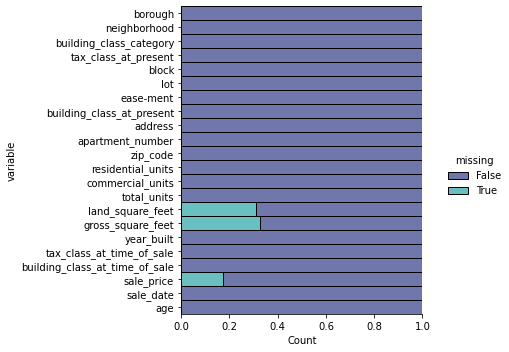

In [15]:
#stacked bar plot: to visualise the amount of missing data using sns.displot()
# reference: https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/#:~:text=One%20of%20the%20ways%20to,%2C%20the%20creator%20of%20Seaborn).

plt.figure(figsize=(10,6))
sns.displot(
            data=df_housing.isna().melt(value_name="missing"),
            y="variable",
            hue="missing",
            palette="mako",
            multiple="fill",
            aspect=1.25)

We can see from the above visualisation that our dataset is decent as it does not have much missing values. There are however, missing values for three fields - land_square_feet, gross_square_feet and sale_price. 

The absence of values in certain columns may be explained in the following ways: 

reference: https://www.mansionglobal.com/articles/why-it-s-hard-to-get-a-home-s-exact-square-footage-and-why-it-may-not-matter-119000
    
1. There is no real estate industry standard of measuring the square footage of residential units. What is considered a "liveable" space to some may not be to others. An example of such space would be the stairs. Some people may include the area of the stairs as part of the measurement while others may not. This leads to a discrepancy in determining the accurate size of the property for each potential buyer. 


2. There may be a case of a transfer or inheritance of  property ownership which involves no monetary transaction resulting in no sale price value associated. 

Since we have concluded that the missing data in the land square feet, gross square feet and the sale price columns are not crucial in this analysis, the missing data in these three columns will be dropped. 

In [16]:
#drop the three columns with missing values
df_housing = df_housing.dropna()

Verify that there are no missing values in our datatset

In [17]:
df_housing.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease-ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
dtype: int64

### 5. Data Cleaning: Identify nonsensical data and outliers and decide whether to drop or keep them

    a. year_built column (must be more than 0)
    b. gross sf and land sf (must be more than 0)
    c. sale prices (outliers may exist)
    d. gross sf must be greater than land sf

Check description of dataset to spot nonsensical data outliers

In [18]:
df_housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,48244.0,2.566537e+00,1.746548e+01,0.0,1.0,1.0,2.0,1.844000e+03
commercial_units,48244.0,2.491709e-01,1.098807e+01,0.0,0.0,0.0,0.0,2.261000e+03
total_units,48244.0,2.834632e+00,2.075042e+01,0.0,1.0,1.0,2.0,2.261000e+03
land_square_feet,48244.0,3.358117e+03,3.143590e+04,0.0,1413.0,2140.0,3071.0,4.228300e+06
gross_square_feet,48244.0,3.669753e+03,2.947491e+04,0.0,828.0,1620.0,2520.0,3.750565e+06
year_built,48244.0,1.827765e+03,4.643612e+02,0.0,1920.0,1931.0,1961.0,2.017000e+03
sale_price,48244.0,1.153281e+06,1.340131e+07,0.0,80420.0,480000.0,830000.0,2.210000e+09
age,48244.0,1.942348e+02,4.643612e+02,5.0,61.0,91.0,102.0,2.022000e+03


a. We can see in the above cell that the minimum value of data in the year_built column is 0. This is impossible and guaranteed the data has been recorded inaccurately.

In [19]:
#check dataframe where year_built is 0
df_housing[df_housing['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,,G7,1885 BATHGATE AVENUE,,...,0,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15,2022
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,,V9,1996 WEBSTER AVENUE,,...,0,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19,2022
18373,Bronx,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,,Z9,1816 WEBSTER AVENUE,,...,0,0,3082.0,0.0,0,4,Z9,300000.0,2016-11-03,2022
18756,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,,V0,1475 HICKS STREET,,...,0,0,2375.0,0.0,0,1,V0,98000.0,2016-10-31,2022
18757,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,,V0,3552 EASTCHESTER ROAD,,...,0,0,3400.0,0.0,0,1,V0,0.0,2017-03-16,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Queens,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,,C1,112-48 38TH AVENUE,,...,0,8,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10,2022
54054,Queens,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,,Z9,5506 VAN CLEEF STREET,,...,0,0,926.0,384.0,0,4,Z9,113000.0,2017-08-09,2022
57321,Queens,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,,D3,142-11 CHERRY AVENUE,,...,0,10,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19,2022
65906,Queens,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,,A3,45-39 BROWVALE LANE,,...,0,1,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06,2022


Discard rows where year_built is 0

In [20]:
df_housing = df_housing[df_housing['year_built']!=0]

b. It is impossible for a housing unit to have a land square feet and gross square feet of 0. Rows with such values will be removed. 

In [21]:
#determine the number of rows with land square feet=0
df_housing[df_housing['land_square_feet']==0] #8345 rows 

#remove these 8345 rows
df_housing = df_housing[df_housing['land_square_feet']!=0]

In [22]:
#determine the number of rows with gross square feet=0
df_housing[df_housing['gross_square_feet']==0] #8522 rows 

#remove the 8522 rows 
df_housing = df_housing[df_housing['gross_square_feet']!=0] 

Check updated dataset description

In [23]:
df_housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,36805.0,3.182095e+00,1.982145e+01,0.0,1.0,2.0,2.0,1.844000e+03
commercial_units,36805.0,3.231898e-01,1.257908e+01,0.0,0.0,0.0,0.0,2.261000e+03
total_units,36805.0,3.504062e+00,2.360379e+01,0.0,1.0,2.0,2.0,2.261000e+03
land_square_feet,36805.0,4.197334e+03,3.577842e+04,200.0,2000.0,2500.0,3800.0,4.228300e+06
gross_square_feet,36805.0,4.790491e+03,3.363749e+04,60.0,1428.0,2000.0,2898.0,3.750565e+06
year_built,36805.0,1.939078e+03,3.028128e+01,1800.0,1920.0,1930.0,1955.0,2.017000e+03
sale_price,36805.0,1.305841e+06,1.518571e+07,0.0,160000.0,504237.0,840000.0,2.210000e+09
age,36805.0,8.292189e+01,3.028128e+01,5.0,67.0,92.0,102.0,2.220000e+02


There are now 36805 records in out dataset.

We can find possible outliers using data visualisation 

Text(0.5, 0, 'Year built')

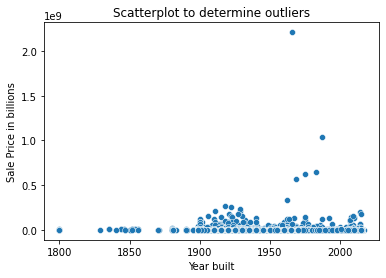

In [24]:
#plot scatter plot
sns.scatterplot(data=df_housing, x='year_built', y='sale_price')

plt.title("Scatterplot to determine outliers")
plt.ylabel("Sale Price in billions")
plt.xlabel("Year built")

From the scatterplot above, we can see that there are a few outliers for sale prices. However, there is plausible reason that a property that costs over 2 billion dollars may exist such as a multistorey  building. 

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_price', ylabel='Density'>

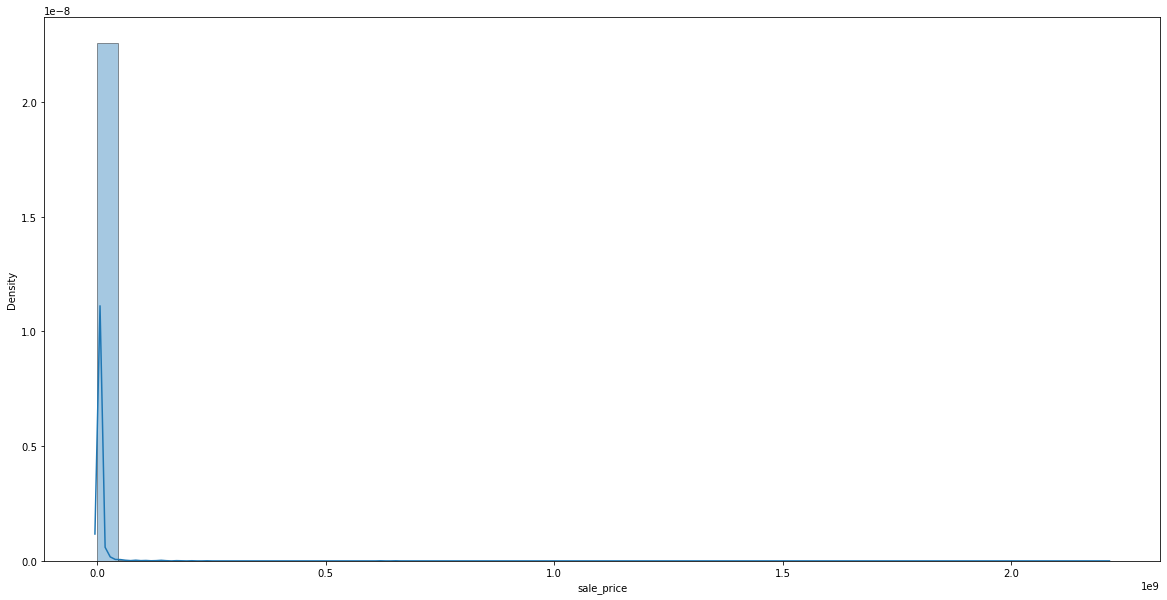

In [25]:
#create a distribution plot of housing sale prices 
plt.figure(figsize=(20,10))
sns.distplot(df_housing['sale_price'], kde=True, hist_kws=dict(edgecolor="k"))

We can see from the distribution plot that it will be difficult to carry out our analysis as the price range of property is too wide and the highest sale prices are extremely far away from  housing price ranges where the houses are mostly concentrated in. Hence, for the purpose of this analysis to determine the features that affect the housing property sales, we will be focusing on properties with price ranges 10 million dollars and below. The data exploration will still be valid as the majority of the property sales were below $10 million. 

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_price', ylabel='Density'>

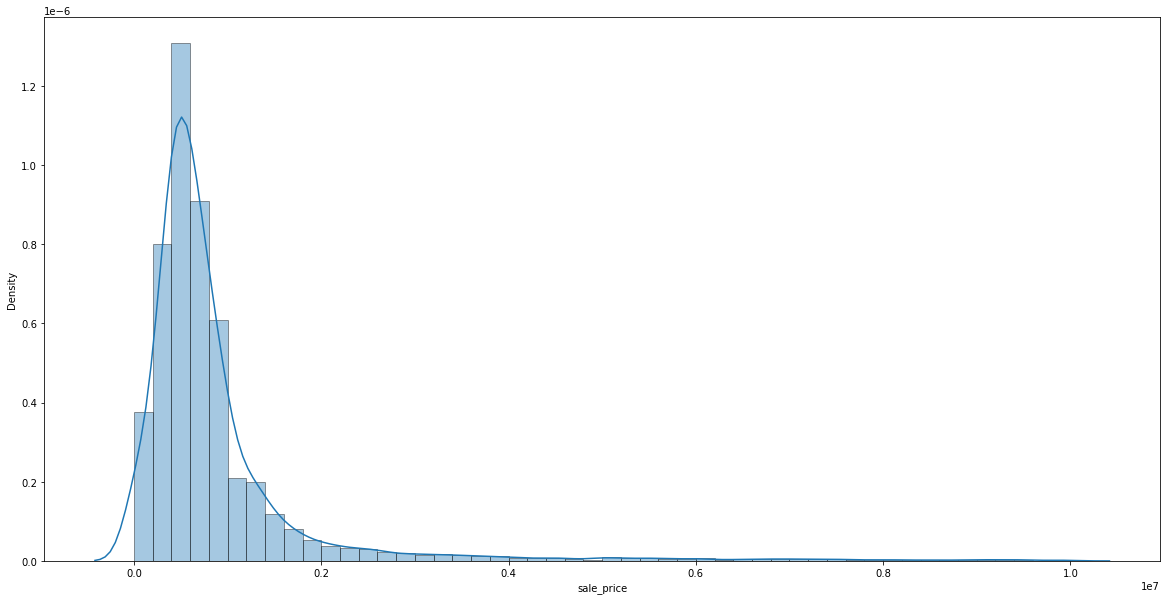

In [26]:
#limiting the price range to houses with prices below $10mil and more than $0 
df_housing2= df_housing[(df_housing['sale_price'] < 10000000) & (df_housing['sale_price'] >0)]


#plot new distribution plot
plt.figure(figsize=(20,10))
sns.distplot(df_housing2['sale_price'], kde=True, hist_kws=dict(edgecolor="k"))

Looking for more outliers within the datatset. In particular, the gross square feet and the land square feet. 
Gross square feet measures the total area of an enclosed space which includes the interior floor space as well as the interior and exterior walls. Land square feeet on the other hand only includes the land/floor space. Hence, land square feet is a subset of gross square feet. Gross square feet will always be greater than the land square feet. Any dataset with values that state otherwise can be deemed inaccurate. 

Text(0.5, 0, 'Land Square Feet')

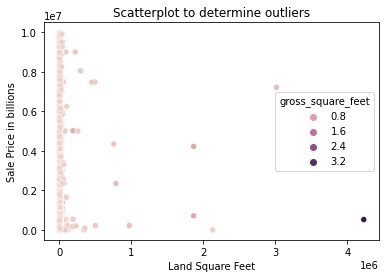

In [27]:
#plot a scatter plot to find any other outliers within the dataset 

sns.scatterplot(data=df_housing2, x='land_square_feet', y='sale_price', hue='gross_square_feet')

plt.title("Scatterplot to determine outliers")
plt.ylabel("Sale Price in billions")
plt.xlabel("Land Square Feet")

In [28]:
df_housing2 = df_housing2[(df_housing2['sale_price'] < 10000000)
                         & (df_housing2['sale_price']>10000)
                         & (df_housing2['land_square_feet'] < df_housing2['gross_square_feet'])
                         & (df_housing2['gross_square_feet'] < 2530)
                         & (df_housing2['gross_square_feet'] > 120)]

In [29]:
df_housing2.drop_duplicates()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
1078,Manhattan,CHINATOWN,22 STORE BUILDINGS,4,162,47,,K4,10-14 DOYERS STREET,,...,3,4,892.0,1784.0,1920,4,K4,3000000.0,2017-07-31,102
3062,Manhattan,GRAMERCY,02 TWO FAMILY DWELLINGS,1,900,55,,B1,204 EAST 20TH STREET,,...,0,2,1619.0,2520.0,1910,1,B1,7000000.0,2017-04-14,112
4171,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,584,31,,A4,75 BEDFORD STREET,,...,0,1,1640.0,2400.0,1901,1,A4,7800000.0,2017-08-15,121
4172,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,,A5,2 GROVE COURT,,...,0,1,384.0,1152.0,1901,1,A5,1375000.0,2016-10-07,121
4174,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,606,28,,S1,66 GREENWICH AVENUE,,...,1,2,925.0,2337.0,1910,1,S1,4065000.0,2017-08-03,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84486,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,226,,A5,19 PEMBROOK LOOP,,...,0,1,1616.0,2137.0,1992,1,A5,417500.0,2016-11-15,30
84487,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,246,,A5,61 PEMBROOK LOOP,,...,0,1,1428.0,2206.0,1992,1,A5,470000.0,2017-05-04,30
84488,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,280,,A5,131 PEMBROOK LOOP,,...,0,1,1669.0,1828.0,1993,1,A5,425000.0,2017-07-10,29
84489,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,311,,A5,203 PEMBROOK LOOP,,...,0,1,1360.0,1672.0,1992,1,A5,354000.0,2016-09-12,30


## Statistical Analysis and Data Visualisation

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_price', ylabel='Density'>

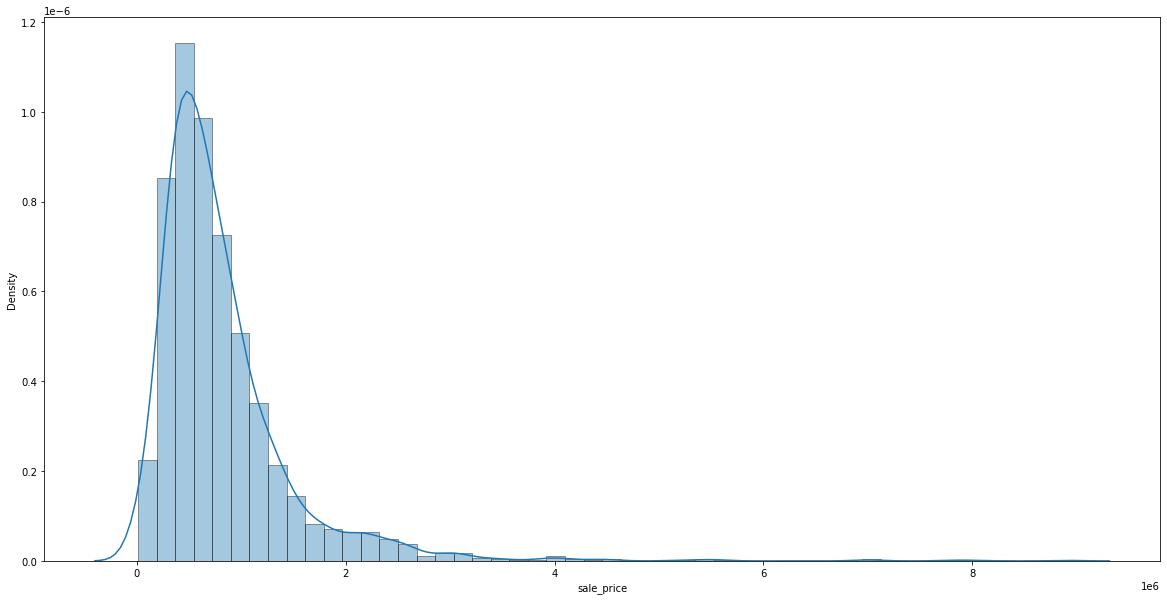

In [30]:
#plot new distribution plot
plt.figure(figsize=(20,10))
sns.distplot(df_housing2['sale_price'], kde=True, hist_kws=dict(edgecolor="k"))

In [31]:
df_housing2.dtypes

borough                                   object
neighborhood                            category
building_class_category                 category
tax_class_at_present                    category
block                                   category
lot                                     category
ease-ment                               category
building_class_at_present               category
address                                 category
apartment_number                        category
zip_code                                category
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale               category
building_class_at_time_of_sale          category
sale_price                               float64
sale_date           

### Visualise sale prices against features using boxplots

We can see from above that there are a total of 10 categorical features in the cleaned dataset:
1. neighborhood, 
2. building_class_category
3. tax_class_at_present
4. block 
5. lot
6. ease-ment
7. building_class_at_present
8. address
9. apartment_number
10. zip_code

Comparing the sale prices against each of the categorical features will help us better understand the whether the features affect the sale prices. 

A boxplot is a standardised way of displaying the distribution of data based on a five number summary (min, 25%, median, 50%, 75%, max)

Text(0.5, 1.0, 'Commercial units vs Sale Price')

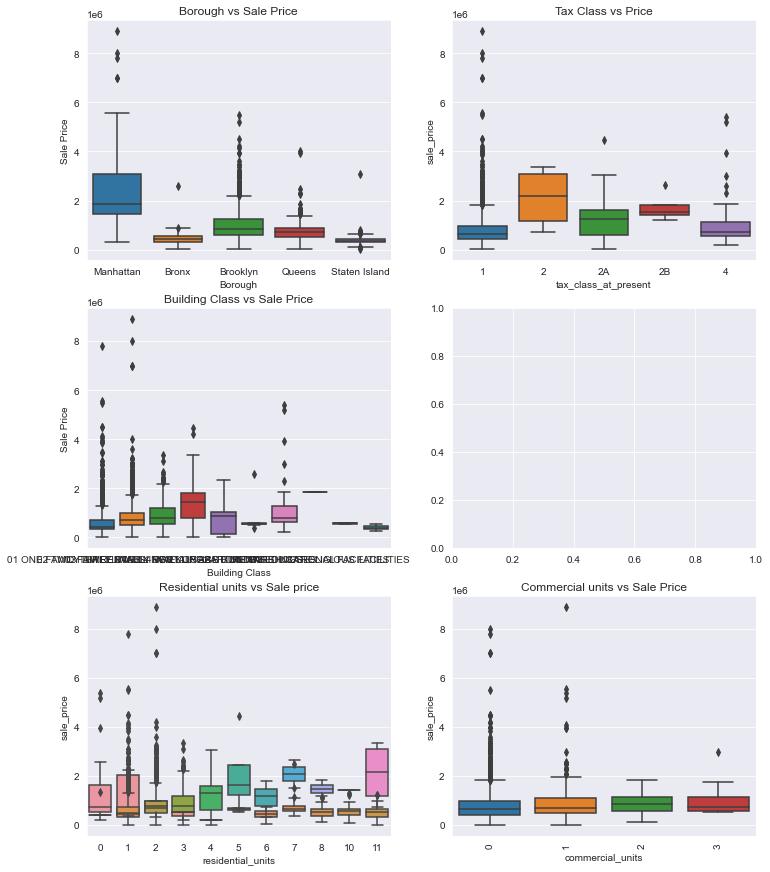

In [35]:
#create a 2 by 2 subplot figure
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize=(12, 15))

#first subplot: borough vs price 
sns.boxplot(x='borough', y='sale_price', data=df_housing2, ax=axes[0,0])
axes[0,0].set_xlabel('Borough')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Borough vs Sale Price')



#second subplot: tax class vs price 
#find distinct tax classes 
distinct_tax = sorted(df_housing2['tax_class_at_present'].unique())
sns.boxplot(x='tax_class_at_present', y='sale_price', data=df_housing2, ax=axes[0,1], order=distinct_tax)
axes[0,1].set_title("Tax Class vs Price")

#third subplot: building class vs price 
#Commercial buildings in New York classified according to a class rating system. The criteria is based on the quality and amount of amenities offered. These standards determine the desirability and price of a rental or leased space.''''''
#find distinct building classes
distinct_class = sorted(df_housing2['building_class_category'].unique())
sns.boxplot(x='building_class_category', y='sale_price', data=df_housing2, ax = axes[1,0], order = distinct_class)
axes[1,0].set_xlabel('Building Class')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Building Class vs Sale Price')
plt.xticks(rotation=90)

#fourth subplot: age vs price
sns.boxplot(x='age', y='sale_price', data=df_housing2, ax=axes[2,0])
axes[2,0].set_title("age vs Sale price")

#fifth subplot: residential units vs price
sns.boxplot(x='residential_units', y='sale_price', data=df_housing2, ax=axes[2,0])
axes[2,0].set_title("Residential units vs Sale price")

#sixth subplot: commercial units vs price
sns.boxplot(x='commercial_units', y='sale_price', data=df_housing2, ax=axes[2,1])
axes[2,1].set_title('Commercial units vs Sale Price')

# plt.tight_layout()
# plt.show()

### Analysis
Based on the results on the boxplot, we can see that 

<b> a. Borough vs. Price: </b> \
The most expensive borough is Manhattan.

The median sale price for Manhattan is around $1,900,000. 

The median sale price in Brooklyn is around $1,000,000. 

The median sale price in Queens is around $900,000. 

The median sale price in Bronx is around $500,000. 

Finally, the median sale price in Staten Island is around $400,000.

<b> b. Tax Class vs. Price </b>
Properties in Tax Class 2 have the highest median prices. This is expected since residential properties with more than 3 units including co-ops and condominiums make up the properties in this tax class. 

<b> c. Building Class vs. Price </b>

<b> d. Age vs. Price </b>

Sale prices of houses built pre-war were much higher than those built post-war. This is expected as houses built before the war is usually more desirable among property buyers. In addition to the fact that these houses are usually more sturdy, and have historic value and character, they are very good investment since these buildings are also more likely to get demolished to make way for bigger buildings by large corporations. 

<b> e. Residential Units vs. Price </b>

The greater the number of residential units, the higher the sale prices. 

<b> f. Commercial Units vs. Price </b>

Similar to residential units, the greater the number of commercial units, the higher the sale prices. 

### Visualising the 15 most expensive neighborhoods in New York City

Text(0.5, 1.0, 'Average Property Prices in the 15 most expensive neighborhoods in New York City')

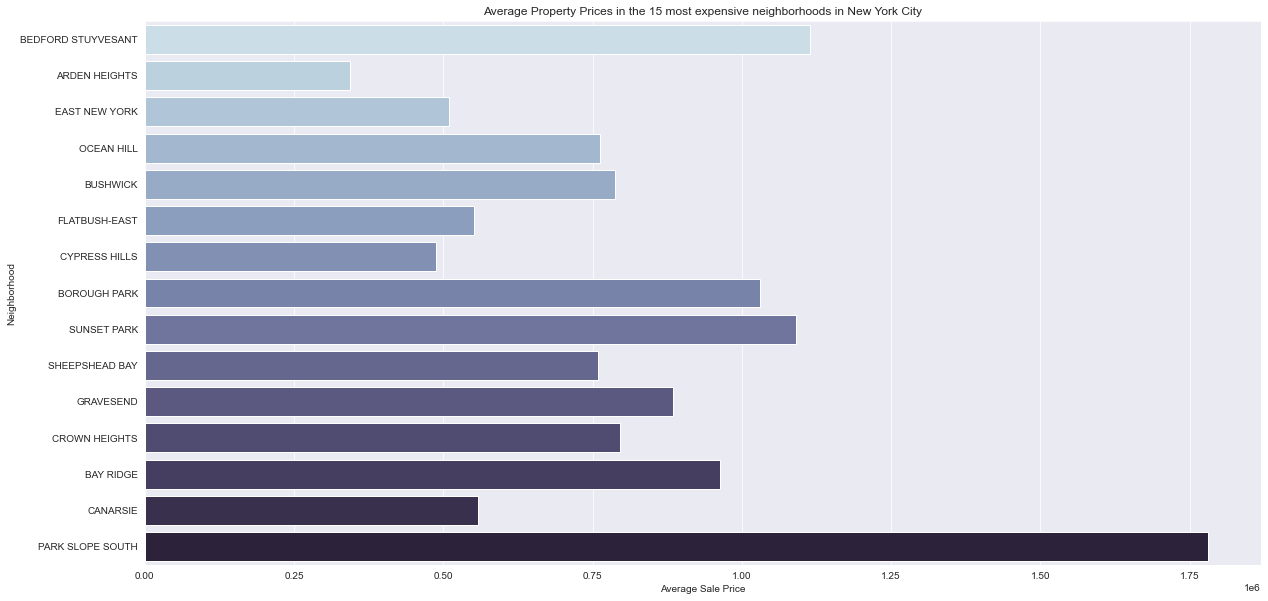

In [36]:
#neighborhood

#create a list of the 15 neighborhoods with the highest sale prices 
from collections import Counter 
neighborhood = list(dict(Counter(df_housing2.neighborhood).most_common(15)).keys())

#find the average price of the sales in each neighborhood
avg_nb_prices =[]
for i in neighborhood:
    avg_price = np.mean(df_housing2.sale_price[df_housing2.neighborhood == i])
    avg_nb_prices.append(avg_price)
    
#plot top 15 neighborhoods  
plt.figure(figsize=(20,10))

ax= sns.barplot(x=avg_nb_prices, y=neighborhood, palette="ch:s=.25,rot=-.25",)
ax.set_xlabel("Average Sale Price")
ax.set_ylabel("Neighborhood")
plt.title('Average Property Prices in the 15 most expensive neighborhoods in New York City')

### Analysis 

Park Slope South is the most expensive neighbourhood in New York City by a significant amount while Arden South is the least expensive. 

### Visualising sale prices against attributes with integer datatypes using scatter plots

Text(0.5, 1.0, 'Age vs Price')

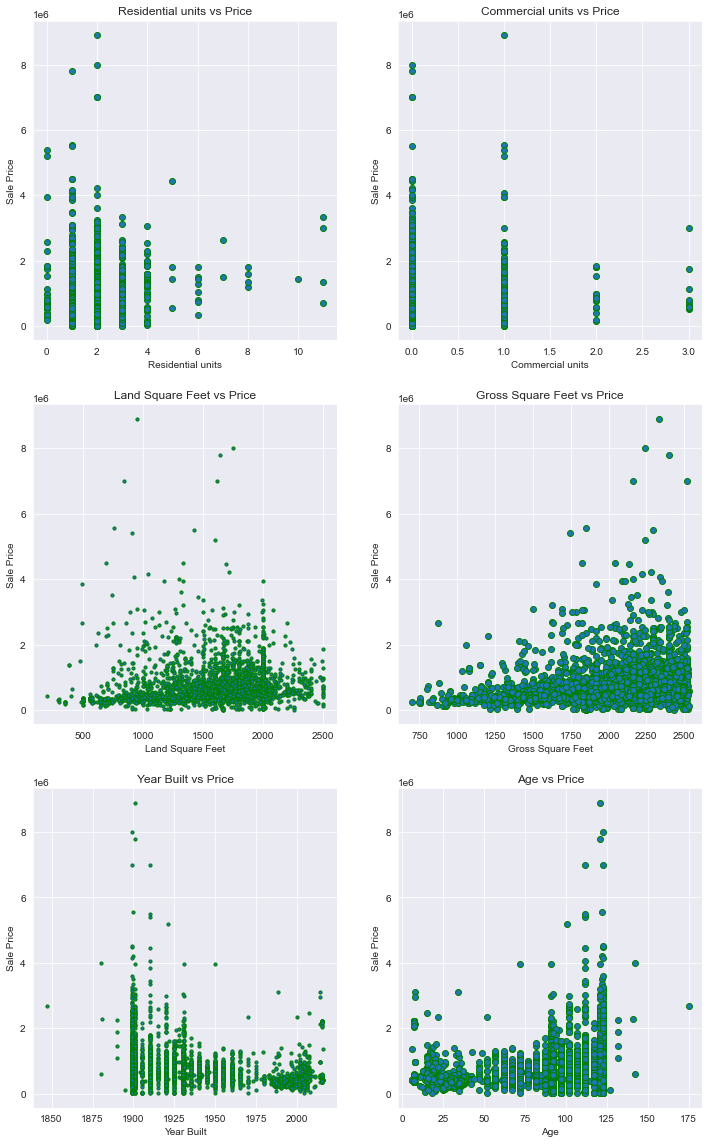

In [37]:
f, axes= plt.subplots(3,2, figsize=(12,20))

#residential units vs sale price
axes[0,0].scatter(x='residential_units', y='sale_price', data=df_housing2, edgecolor='g')
axes[0,0].set_xlabel('Residential units')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Residential units vs Price')

#commericial units vs price 
axes[0,1].scatter(x='commercial_units', y='sale_price', data=df_housing2, edgecolor='g')
axes[0,1].set_xlabel('Commercial units')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Commercial units vs Price')

# #land square feet vs sale price 
axes[1,0].scatter(x='land_square_feet', y='sale_price', data=df_housing2, edgecolor='g', s=10)
axes[1,0].set_xlabel('Land Square Feet')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Land Square Feet vs Price')

#gross square feet vs sale price 
axes[1,1].scatter(x='gross_square_feet', y='sale_price', data=df_housing2, edgecolor='g')
axes[1,1].set_xlabel('Gross Square Feet')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Gross Square Feet vs Price')

#year built vs sale price 
axes[2,0].scatter(x='year_built', y='sale_price', data=df_housing2, edgecolor='g', s=10)
axes[2,0].set_xlabel('Year Built')
axes[2,0].set_ylabel('Sale Price')
axes[2,0].set_title('Year Built vs Price')

#age vs sale price
axes[2,1].scatter(x='age', y='sale_price', data=df_housing2, edgecolor='g')
axes[2,1].set_xlabel('Age')
axes[2,1].set_ylabel('Sale Price')
axes[2,1].set_title('Age vs Price')

### Analysis

There is a clear positive relationship between the gross square footage of a property and the sale price. This is expected since a bigger unit would normally be more expensive than a smaller unit. 

There is a clear positive relationship between sale price and theage of the property was built. The older the property, the higher the sale prices. 

## Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

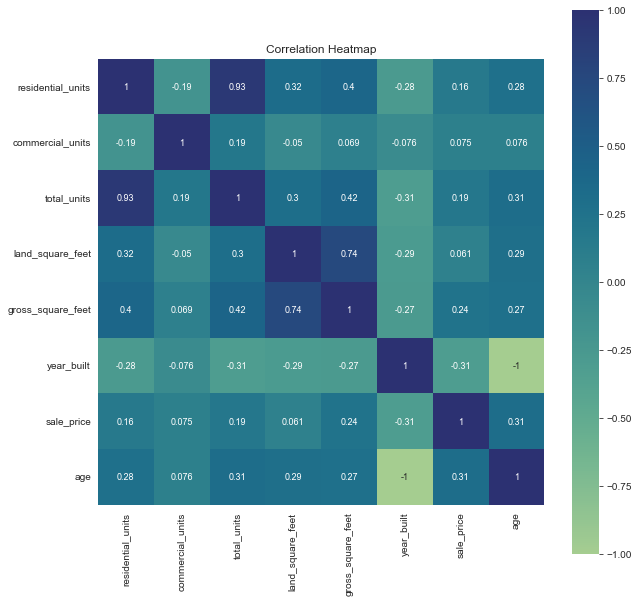

In [39]:
#plot correlation heatmap 
corrHeatMap = df_housing2.corr()
f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corrHeatMap, cmap ='crest', square=True, annot=True, annot_kws={"size": 9})
plt.title('Correlation Heatmap')

### Analysis
Land square feet has the weakest positive correlation of 0.061 with the sale price. This is interesting as gross square feet is an attribute with one of the highest positive correlation with the sale prices of 0.24. This proves that gross square feet is more important than land square feet in deciding the prices of the properties. 

Age has the highest positive correlation of 0.31 with sale prices. Older houses are more desired as they make better good investment and usually have unique eye-catching architecture since there are not many pre-war buildings left in the metropolitan city. 

## Building Machine Learning Model: Linear Regression 
Linear regression is a supervised machine learning that is used to identify relationships between the variable of interest (sale price) and the inputs (attribute variables), and predict its values based on the values of the input variables. 
I will be using the scikit library to build the regression model.

Data from the attributes 'residential_units', 'commercial_units', 'total_units', 'land_square_feet','gross_square_feet', 'year_built' and 'age' will be used to train the ML Model. These attributes were chosen are have integer datatypes  

In [43]:
#split 
#create training variables
X = df_housing2[['residential_units', 'commercial_units', 
                'total_units', 'land_square_feet',
               'gross_square_feet', 'year_built','age']]

#create target variable 
y = df_housing2['sale_price']

#scikit library for the regression model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

#split training and testing data 
#test size is 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#train data 
regr = LinearRegression()
regr.fit(X_train, y_train)

#LinearRegression()

#predict data 
y_pred = regr.predict(X_test)

#print(X_test)
#print(y_test)

# plt.scatter(X_test, y_test, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


# III. Conclusions

### Evaluation of the ML Model 
There are 2 main metrics for model evaluation in a regression model.
1. Mean Squared Error
2. Root Mean Squared Error (RMSE)

In [ ]:
#evaluate accuracy of prediction 

from sklearn import metrics
from sklearn.metrics import r2_score

R squared is a statistical measure of how close the data points are relatively to the fitted regression line. The values range from 0 to 1. The greater the value, the more accurate the model.

In [54]:
#find R squared 
RSQ=r2_score(y_test, y_pred)
print("R Squared: ", RSQ)
print ("Accuracy", RSQ*100)

R Squared:  0.20972391905643206
Accuracy 20.972391905643207


The accuracy of the model is 21% (rounded to 3s.f)

The Mean Squared Error measures how close a regression line is to a set of data points. The smaller the MSE value, the closer the fit of the data. 

In [49]:
#find the mean square error
MSE=metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)

Mean Squared Error:  405617641958.13


The RMSE is the square root of the variance of the residuals. It indicates how close the data points are to the model's predicted values. This is the square root of MSE.

In [50]:
#find the root mean squared error 
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", RMSE)

Root Mean Squared Error:  636881.1835484937


The difference between the predicted and the actual sale price values is  $636881.18.

#### Visualising the actual and predicted values

Text(0.5, 1.0, 'Actual vs Predicted Values')

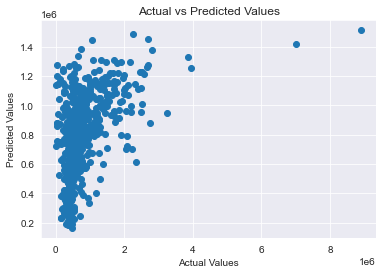

In [59]:
#plot a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title ("Actual vs Predicted Values")

Regression Coefficients are estimates of the unknown population parameters and describe the relationship between the attributes and the sale prices. Thus, using the regression coefficient, we will be able to find the precise change in sale prices for each attributes. 

In [63]:
price_change = pd.DataFrame(data = regr.coef_, index = X.columns, columns = ['Price Changes'])
price_change

,Price Changes
residential_units,-196383.542912
commercial_units,-172911.010596
total_units,221485.144926
land_square_feet,-389.110366
gross_square_feet,579.754330
year_built,-2559.089176
age,2559.089176


Based on the price change coefficients above, 
1. an increase in one residential unit results in the sale price to decrease by $196383.54

2. an increase in one commercial unit results in the sale price to decrease by $172911.01

3. an increase in the total unit results in the sale price to increase by $221485.14

4. an increase in one unit of land square feet results in the sale price to decrease by $389.11

5. an increase in one unit of gross square feet results in the sale price to increase by $579.75

6. properties that are a year older results in the sale price to increase by $2559.09.

Thus, we can conclude that the age of the building is the attribute that contributes the most to the increase in sale prices. 

This information is useful to property agents as well as buyers since they can base and justify their selling and buying prices on the age of the building. 

# References
https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

https://www.kaggle.com/code/eric8395/nyc-property-sales-eda-analysis-w-regression/data

https://www.renthop.com/blog/2014/02/four-reasons-why-pre-war-is-the-best/

https://www.nyc.gov/assets/finance/downloads/pdf/brochures/class_2_guide.pdf

In [64]:
!pip install -U notebook-as-pdf

     |████████████████████████████████| 83 kB 5.2 MB/s  eta 0:00:01
     |████████████████████████████████| 232 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 7.2 MB/s  eta 0:00:01


In [69]:
!pip install pyppeteer

In [71]:
!pip install pandoc

     |████████████████████████████████| 126 kB 15.2 MB/s eta 0:00:01
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33288 sha256=d31d6fe4475b980d2e00dbf11c90c02e4aa6ed8728babc5146259bdbe17962f8
  Stored in directory: /Users/suhyun/Library/Caches/pip/wheels/69/e6/a1/1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc
